In [1]:
# Importo las librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# leo el dataset
dfm = pd.read_csv('../movies_clean.csv', low_memory=False)

In [3]:
dfc = pd.read_csv('../credits_clean.csv', low_memory=False)

In [4]:
dff = dfm[dfm['budget'] != 0]

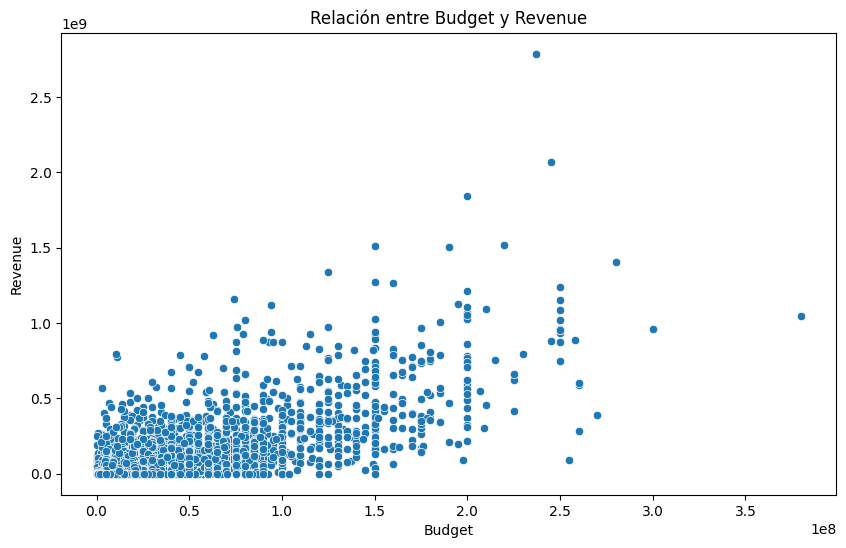

In [5]:
# Relacion entre bugdet y revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dff, x='budget', y='revenue')
plt.title('Relación entre Budget y Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

In [12]:
variables = dfm[['budget', 'revenue']]

# Matriz de correlación
correlation_matrix = variables.corr()

print(correlation_matrix)

           budget   revenue
budget   1.000000  0.768761
revenue  0.768761  1.000000


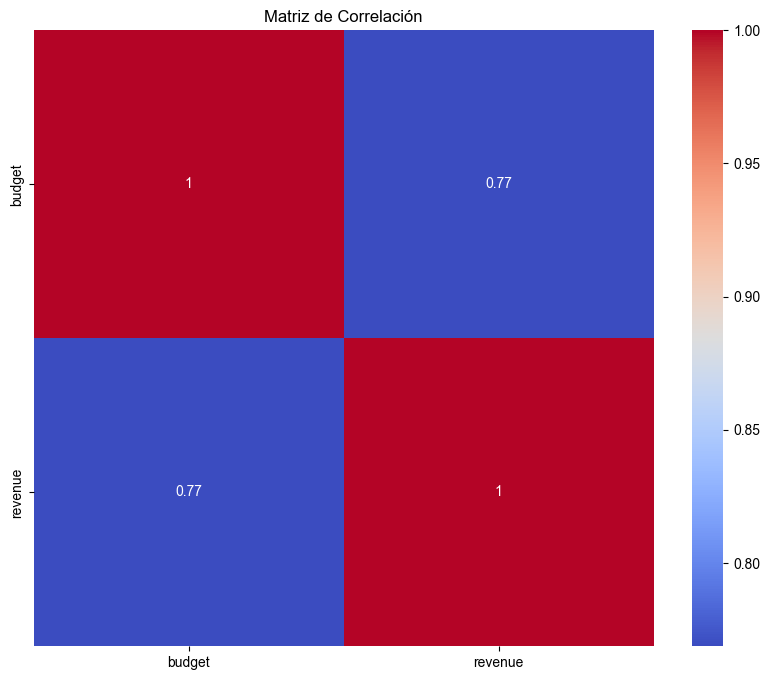

In [13]:
# Visualizacion de la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

El coeficiente de correlación entre "budget" y "revenue" es 0.77, lo que significaria que seria positiva.

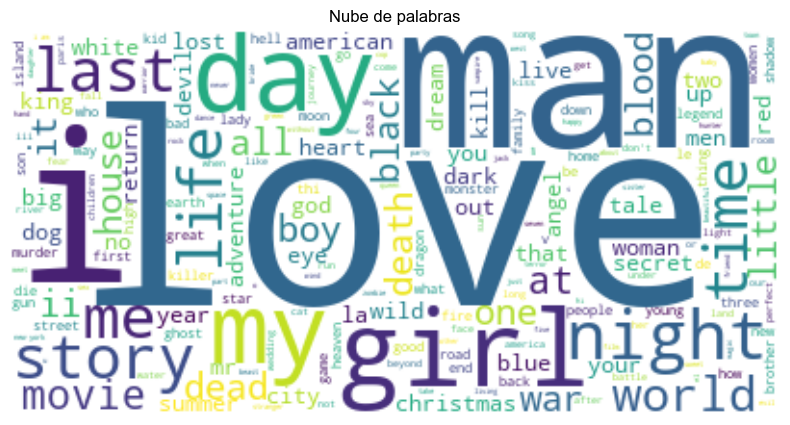

In [9]:
# Clouds of words 
title_words = ' '.join(dfm['title'])
title_words = title_words.lower()
stopwords = ["to", "of", "the", "and", "&", ":", "in", "for", "on", "a", "by", "with", "an", "into", "from"]
wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(title_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.rcParams['font.family'] = 'arial'     
plt.title('Nube de palabras')
plt.show()

Al visualizar la Nube de palabras, se puede observar que las mas frecuentes son Love, Man, Day, girl, Night, day

Deteccion de Outliers en las columnas 'budget' y 'revenue'

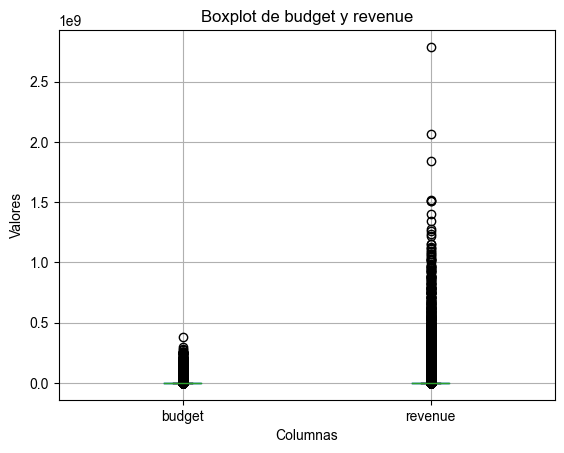

In [10]:
columnas = ['budget','revenue']
dfm[columnas].boxplot()

plt.xlabel('Columnas')
plt.ylabel('Valores')
plt.title('Boxplot de budget y revenue')

plt.show()

In [17]:
# Budget
Q1 = dfm['budget'].quantile(0.25)
Q3 = dfm['budget'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro los registros que contienen outliers en la columna
outliers = dfm.loc[(dfm['budget'] < limite_inferior) | (dfm['budget'] > limite_superior)]

outliers

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,release_year,...,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,return
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,Pixar Animation Studios,United States of America,12.45
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,4.04
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,Twentieth Century Fox Film Corporation,United States of America,5.09
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,NaN,"Regency Enterprises, Forward Pass, Warner Bros.",United States of America,3.12
6,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",11860,en,An ugly duckling having undergone a remarkable...,6.677277,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,1995,...,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,6.2,141.0,NaN,"Paramount Pictures, Scott Rudin Productions, M...","Germany, United States of America",0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45314,2000000,"[{'id': 35, 'name': 'Comedy'}]",293654,ru,"Igor, a furniture store manager, tries to figu...",0.524370,"[{'name': 'Enjoy Movies', 'id': 9340}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2014-09-18,2014,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Corporate Event,3.5,4.0,NaN,Enjoy Movies,Russia,0.00
45320,2000000,"[{'id': 35, 'name': 'Comedy'}]",100152,ru,"Somewhere deep, deep in Russia there is a town...",0.380933,[],[],2004-11-11,2004,...,[],Released,NaN,Mars,5.0,2.0,NaN,NaN,NaN,0.00
45321,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,en,"The sea, August, interesting and simple people...",0.903061,[],[],2006-11-23,2006,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Savages,5.8,6.0,NaN,NaN,NaN,1.66
45323,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,en,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,"[{'name': 'Profit', 'id': 21163}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2010-09-30,2010,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pro Lyuboff,4.0,3.0,NaN,Profit,Russia,0.63


In [18]:
Q1 = dfm['revenue'].quantile(0.25)
Q3 = dfm['revenue'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtro los registros que contienen outliers en la columna.
outliers = dfm.loc[(dfm['revenue'] < limite_inferior) | (dfm['revenue'] > limite_superior)]

outliers

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,release_year,...,spoken_languages,status,tagline,title,vote_average,vote_count,franquicia,productoras,paises,return
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0,Toy Story Collection,Pixar Animation Studios,United States of America,12.45
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,NaN,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,4.04
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,NaN,Twentieth Century Fox Film Corporation,United States of America,5.09
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,Father of the Bride Collection,"Sandollar Productions, Touchstone Pictures",United States of America,0.00
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,en,"Obsessive master thief, Neil McCauley leads a ...",17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1995,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,7.7,1886.0,NaN,"Regency Enterprises, Forward Pass, Warner Bros.",United States of America,3.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45311,750000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",280422,ru,NaN,0.201582,"[{'name': 'Кинокомпания «Lunapark»', 'id': 420...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2014-06-05,2014,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,All at Once,6.0,4.0,NaN,"Кинокомпания «Lunapark», Инвада фильм",Russia,0.00
45313,0,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",240789,ru,The film is based on real events that took pla...,0.436028,"[{'name': 'Central Partnership', 'id': 9342}, ...","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2009-10-09,2009,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,The Miracle,6.3,3.0,NaN,"Central Partnership, Amkart Studios, Russian M...",Russia,0.00
45321,800000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",62757,en,"The sea, August, interesting and simple people...",0.903061,[],[],2006-11-23,2006,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Savages,5.8,6.0,NaN,NaN,NaN,1.66
45323,2000000,"[{'id': 10749, 'name': 'Romance'}, {'id': 18, ...",63281,en,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,"[{'name': 'Profit', 'id': 21163}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",2010-09-30,2010,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Pro Lyuboff,4.0,3.0,NaN,Profit,Russia,0.63
